In [7]:
import pandas as pd

In [10]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [11]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [49]:
df_clean = df.copy() 
df_clean.columns = df_clean.columns.str.strip().str.lower()
df_clean['customerid'] = df_clean['customerid'].fillna("X")

In [50]:
df_clean.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,year_month,customertype
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Basic
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Basic
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Basic
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Basic
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,General


In [51]:
df_clean['totalprice'] = df_clean['quantity'] * df_clean['unitprice']

In [52]:
df_clean['invoicedate'] = pd.to_datetime(df_clean['invoicedate'])

In [53]:
df_clean['year_month'] = df_clean['invoicedate'].dt.to_period('M')

In [54]:
monthly_spend = df_clean.groupby(['customerid','year_month'])['totalprice'].sum().reset_index()

In [55]:
avg_monthly = df_clean.groupby(['customerid','year_month'])['totalprice'].mean().reset_index()
avg_monthly.head(5)

,customerid,year_month,totalprice
0,12346.0,2011-01,0.000000
1,12347.0,2010-12,22.960968
2,12347.0,2011-01,16.392759
3,12347.0,2011-04,26.510417
4,12347.0,2011-06,21.251111


In [62]:
X = avg_monthly.columns
y = avg_monthly.segment

In [56]:
avg_monthly.columns = ['customerid','avg_monthly','totalprice']

In [57]:
avg_monthly['segment'] = pd.qcut(
    avg_monthly['avg_monthly'],3,labels=['Basic','General','VIP'])

In [64]:
avg_monthly.columns

Index(['customerid', 'avg_monthly', 'totalprice', 'segment'], dtype='object')

In [68]:
X = avg_monthly[['customerid', 'avg_monthly', 'totalprice']]
y = avg_monthly['segment']

In [71]:
X = avg_monthly.select_dtypes(include=['number'])

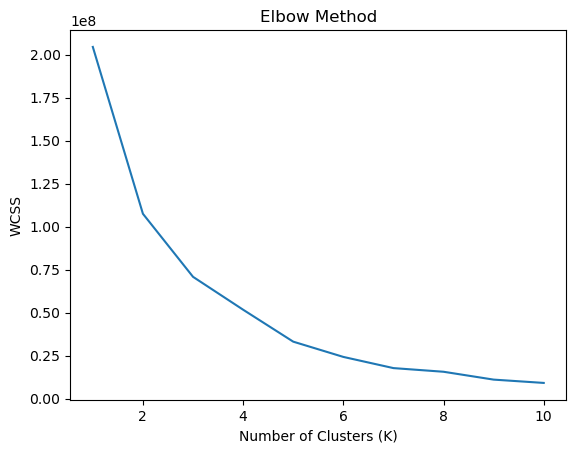

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()